In [5]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 3.4 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.1 MB 3.4 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/8.1 MB 1.4 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.1 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.1 MB 1.1 MB/s eta 0:00:06
   ---------- ----------------------------- 2.1/8.1 MB 1.6 MB/s eta 0:00:04
   ------------- -------------------------- 2.6/8.1 MB 1.7 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/8.1 MB 1.8 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.1 MB 1.9 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.1 MB 1.9 MB/s eta 0:00:03
   ---------------------- ----------------- 4.5/8.1 MB 1.9 MB/s eta 0:00:02
   -------------------------- ------------- 5.2/8.1 MB 2.1 MB/s eta 0:00:02
   ----------------

In [6]:
import nltk
import string
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import re

In [7]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
corpus=[
  "My name is Manidhar Karnatakam",
  "I am learning Gen AI",
  "I am learning Python",
  "I am learning Data Science",
  "I am learning Machine Learning",
  "I am learning Deep Learning",
  "we are trying to learn word2vec,"
  "we will try to build two models from word 2 vec cbow and skipgram",
  "we will also work on clearning the data which is basically a part of data cleaning",
  "word 2 vec is being used for word embedding",
  "it is going to perfrom better than one hot,bow,TF-IDF",
  "hfsdlafjlasdfjklsd lkjdsla;fuo2349023984 234@#$SDFASdf " 
]

In [15]:
s ="my name is Manidhar Karnatakam !!!!!! 3423sdfsad."

In [16]:
re.sub(r'\d', '', s)

'my name is Manidhar Karnatakam !!!!!! sdfsad.'

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
s.translate(str.maketrans('', '', string.punctuation))

'my name is Manidhar Karnatakam  3423sdfsad'

In [19]:
word_tokenize(s)

['my',
 'name',
 'is',
 'Manidhar',
 'Karnatakam',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '3423sdfsad',
 '.']

In [20]:
s1=word_tokenize(s)

In [21]:
s1

['my',
 'name',
 'is',
 'Manidhar',
 'Karnatakam',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '3423sdfsad',
 '.']

In [23]:
[i for i in s1 if i not in stopwords.words('english')]

['name',
 'Manidhar',
 'Karnatakam',
 '!',
 '!',
 '!',
 '!',
 '!',
 '!',
 '3423sdfsad',
 '.']

In [24]:
def word_preProcessing(text):
  text = text.lower()
  text = re.sub(r'\d', '', text)
  text = text.translate(str.maketrans('', '', string.punctuation))
  tokens = word_tokenize(text)
  tokens = [i for i in tokens if i not in stopwords.words('english')]
  return tokens

In [25]:
print(word_preProcessing(s))

['name', 'manidhar', 'karnatakam', 'sdfsad']


In [29]:
processed_corpus=[word_preProcessing(sentence) for sentence in corpus]

In [30]:
processed_corpus

[['name', 'manidhar', 'karnatakam'],
 ['learning', 'gen', 'ai'],
 ['learning', 'python'],
 ['learning', 'data', 'science'],
 ['learning', 'machine', 'learning'],
 ['learning', 'deep', 'learning'],
 ['trying',
  'learn',
  'wordvecwe',
  'try',
  'build',
  'two',
  'models',
  'word',
  'vec',
  'cbow',
  'skipgram'],
 ['also',
  'work',
  'clearning',
  'data',
  'basically',
  'part',
  'data',
  'cleaning'],
 ['word', 'vec', 'used', 'word', 'embedding'],
 ['going', 'perfrom', 'better', 'one', 'hotbowtfidf'],
 ['hfsdlafjlasdfjklsd', 'lkjdslafuo', 'sdfasdf']]

In [31]:
word2vec_cbow = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=1, sg=0)
word2vec_skipgram = Word2Vec(sentences=processed_corpus, vector_size=100, window=5, min_count=1, sg=1)

In [33]:
word2vec_cbow

In [34]:
word2vec_skipgram

In [38]:
word2vec_skipgram.wv['manidhar']

array([-9.5785465e-03,  8.9431154e-03,  4.1650687e-03,  9.2347348e-03,
        6.6435025e-03,  2.9247368e-03,  9.8040197e-03, -4.4246409e-03,
       -6.8033109e-03,  4.2273807e-03,  3.7290000e-03, -5.6646108e-03,
        9.7047603e-03, -3.5583067e-03,  9.5494064e-03,  8.3472609e-04,
       -6.3384566e-03, -1.9771170e-03, -7.3770545e-03, -2.9795230e-03,
        1.0416972e-03,  9.4826873e-03,  9.3558477e-03, -6.5958775e-03,
        3.4751510e-03,  2.2755705e-03, -2.4893521e-03, -9.2291720e-03,
        1.0271263e-03, -8.1657059e-03,  6.3201892e-03, -5.8000805e-03,
        5.5354391e-03,  9.8337233e-03, -1.6000033e-04,  4.5284927e-03,
       -1.8094003e-03,  7.3607611e-03,  3.9400971e-03, -9.0103243e-03,
       -2.3985039e-03,  3.6287690e-03, -9.9568366e-05, -1.2012708e-03,
       -1.0554385e-03, -1.6716016e-03,  6.0495257e-04,  4.1650953e-03,
       -4.2527914e-03, -3.8336217e-03, -5.2816868e-05,  2.6935578e-04,
       -1.6880632e-04, -4.7855065e-03,  4.3134023e-03, -2.1719194e-03,
      

In [39]:
word2vec_skipgram.vector_size

100

In [40]:
len(word2vec_skipgram.wv['manidhar'])

100

In [48]:
word2vec_skipgram.wv.most_similar('machine', topn=5)

[('also', 0.1427941471338272),
 ('trying', 0.1281948685646057),
 ('deep', 0.10941850394010544),
 ('python', 0.1088901236653328),
 ('hotbowtfidf', 0.10811808705329895)]

In [46]:
word2vec_cbow.wv.similarity('machine', 'learning')

0.06285078

In [47]:
word2vec_cbow.wv.index_to_key

['learning',
 'word',
 'data',
 'vec',
 'karnatakam',
 'gen',
 'ai',
 'python',
 'manidhar',
 'models',
 'machine',
 'deep',
 'trying',
 'learn',
 'wordvecwe',
 'try',
 'build',
 'two',
 'science',
 'sdfasdf',
 'lkjdslafuo',
 'cbow',
 'hfsdlafjlasdfjklsd',
 'hotbowtfidf',
 'one',
 'better',
 'perfrom',
 'going',
 'embedding',
 'used',
 'cleaning',
 'part',
 'basically',
 'clearning',
 'work',
 'also',
 'skipgram',
 'name']

In [52]:
word2vec_cbow.wv.most_similar('karnatakam',topn=5)


[('learn', 0.2528402805328369),
 ('perfrom', 0.20082910358905792),
 ('cleaning', 0.17527639865875244),
 ('data', 0.17020943760871887),
 ('trying', 0.15006306767463684)]

In [53]:
word2vec_skipgram.wv.most_similar('karnatakam',topn=5)

[('learn', 0.2532992959022522),
 ('perfrom', 0.20082910358905792),
 ('cleaning', 0.1755191683769226),
 ('data', 0.17015618085861206),
 ('trying', 0.15030580759048462)]

In [57]:
from sklearn.manifold import TSNE

In [59]:
word_vectors=word2vec_cbow.wv
vocab=list(word_vectors.index_to_key)

In [61]:
len(vocab)

38

In [63]:
X=np.array([word_vectors[i] for i in vocab])

In [64]:
tsne=TSNE(n_components=2)

In [68]:
x_new_embeddings=tsne.fit_transform(X)

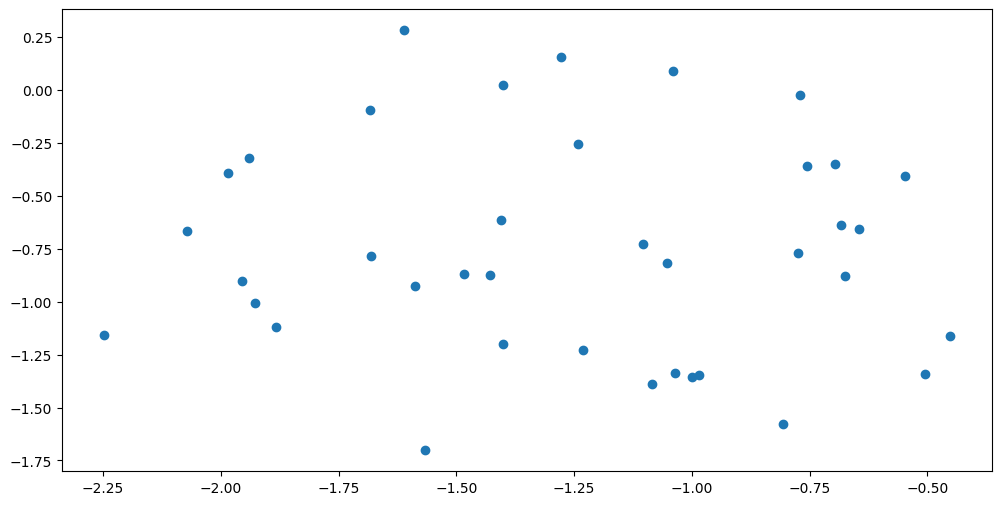

In [69]:
plt.figure(figsize=(12, 6))
plt.scatter(x_new_embeddings[:, 0], x_new_embeddings[:, 1], marker='o')

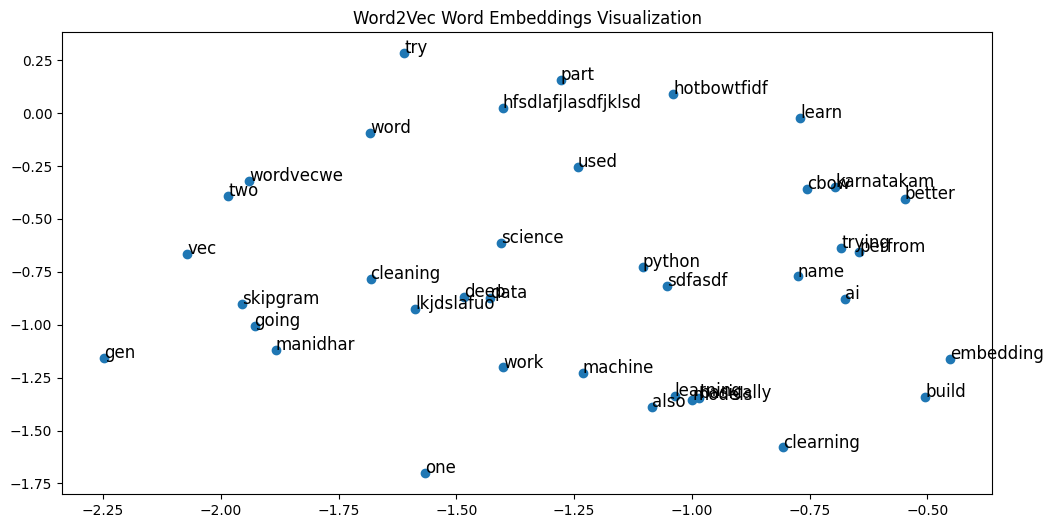

In [74]:
plt.figure(figsize=(12, 6))
plt.scatter(x_new_embeddings[:, 0], x_new_embeddings[:, 1], marker='o')
for i,words in enumerate(vocab[:len(x_new_embeddings)]):
    if words in vocab:
        plt.annotate(words, xy=(x_new_embeddings[i, 0], x_new_embeddings[i, 1]), fontsize=12)
plt.title('Word2Vec Word Embeddings Visualization')
plt.show()

In [82]:
from nltk import ne_chunk,pos_tag

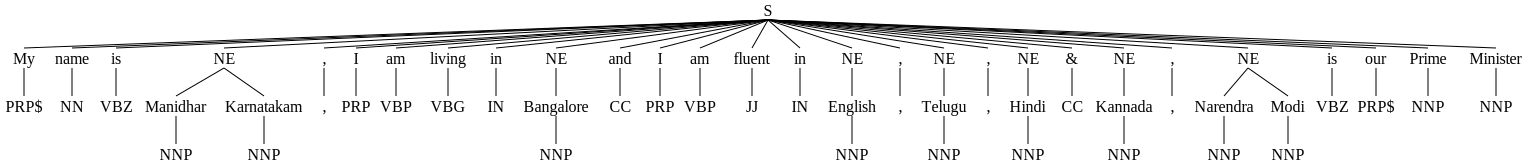

In [84]:
ne_chunk(pos_tag(word_tokenize("My name is Manidhar Karnatakam, I am living in Bangalore and I am fluent in English, Telugu, Hindi & Kannada, Narendra Modi is our Prime Minister")), binary=True)

In [79]:
pip install svgling

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
